In [1]:
import numpy as np

In [24]:
max_sum = 0

currentMatchingPositions = []
matchingPositions = []

def getMax(matrix,check,row,curr_sum):
    global max_sum
    global matchingPositions
    #base case, we have reached the last element.
    #check to see if this combination is max
    if(row==len(matrix)-1):
        for i in range(len(check)):
            if(check[i]==0 and (matrix[row][i]+curr_sum)>max_sum):
                max_sum = matrix[row][i]+curr_sum
                currentMatchingPositions.append((row, i))
                matchingPositions = currentMatchingPositions.copy()
                currentMatchingPositions.remove((row, i))
    #recursive case, pick the current available number, go to next Number.
    else:
        for i in range(len(check)):
            if(check[i]==0):
                check[i]=1
                currentMatchingPositions.append((row, i))
                getMax(matrix,check,row+1,curr_sum+matrix[row][i])
                check[i]=0
                currentMatchingPositions.remove((row, i))

In [26]:
def output(mat, pos):
    total = 0
    ans_mat = np.zeros((mat.shape[0], mat.shape[1]))
    for i in range(len(pos)):
        total += mat[pos[i][0], pos[i][1]]
        ans_mat[pos[i][0], pos[i][1]] = mat[pos[i][0], pos[i][1]]
    return total, ans_mat



data_matrix = np.array([[82, 83, 69, 92],
            [77, 37, 49, 92],
            [11, 69, 5, 86],
            [8, 9, 98, 23],
            ])
check = [0]* len(data_matrix)
import time
startTime = time.time()
getMax(data_matrix.copy(),check,0,0)#Get the element position.
ans_pos = matchingPositions
timetaken = time.time() - startTime
ans, ans_mat = output(data_matrix, ans_pos)#Get the minimum or maximum value and corresponding matrix.
print('The optimal kidney pairs',ans_pos)
print('Time taken by algorithm = ', timetaken, " seconds")
#Show the result
print(f"Linear Assignment problem result: {ans:.0f}\n{ans_mat}")

The optimal kidney pairs [(0, 1), (1, 0), (2, 3), (3, 2)]
Time taken by algorithm =  0.000152587890625  seconds
Linear Assignment problem result: 344
[[ 0. 83.  0.  0.]
 [77.  0.  0.  0.]
 [ 0.  0.  0. 86.]
 [ 0.  0. 98.  0.]]


# Visualization 1

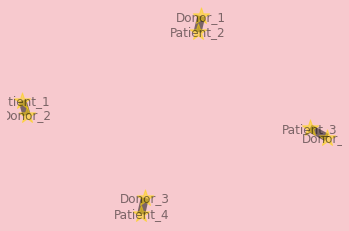

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

donor_list = []
patient_list = []

for row in range(len(data_matrix)):
    Donor = 'Donor_'
    Patient = 'Patient_'
    Donor = Donor+str(row + 1)
    Patient = Patient+str(row + 1)
    donor_list.append(Donor)
    patient_list.append(Patient)

g = nx.Graph()
 
for node in ans_pos:
    g.add_edge(donor_list[node[0]], patient_list[node[1]])

pos = nx.spring_layout(g, seed=3113794652)  # positions for all nodes

labels = {}
for i in donor_list:
    labels[i] = i
    
for i in patient_list:
    labels[i] = i
    
fig, ax = plt.subplots()
nx.draw(g, pos, width=8, alpha=0.5, labels = labels,node_shape='*', font_size=12, font_color="black", node_color='gold',edge_color='black')


ax.set_facecolor('#E17C88')
ax.axis('off')
fig.set_facecolor('#F7C9CE')
plt.show()

# Visualization 2

In [ ]:
from pyvis.network import Network

net = Network()

for i in range(len(donor_list)):
    net.add_node(i, label=donor_list[i],color='#3da831')

# i has a value of length of donor_list now
# we need to continue adding nodes with incrementing index from last node of donor 
# We shouldn't be generating node numbers from 1 because it has already been assigned to donor nodes

for i in range(len(patient_list)):
    net.add_node(i + len(patient_list), label=patient_list[i], color = '#3155a8')

for node in ans_pos:
    net.add_edge(int(node[0]), int(node[1]) + len(patient_list),  value=2)

net.repulsion(node_distance=100, spring_length=100)
net.show('node1.html')

![image.png](attachment:image.png)